In [380]:
import numpy as np
import pandas as pd

In [381]:
credits = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tmdb_5000_credits.csv")
movies = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tmdb_5000_movies.csv")

In [382]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [383]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [384]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [385]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

We combine both the movies and credits dataframes on the columns movie_id, title.

In [386]:
movies = credits.merge(movies,left_on=['movie_id','title'],right_on=['id','title'])

In [387]:
movies.head(1)

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800


from all the columns we need only some columns for EDA and then for using in our model.

# Columns:
movie_id,title,cast,crew,budget,genres,keywords,overview,popularity,revenue,vote_average and vote_count

In [388]:
movies = movies[['movie_id', 'title', 'cast', 'crew', 'genres', 'keywords',
                 'overview', 'budget','popularity', 'revenue',
       'vote_average', 'vote_count']]

In [389]:
movies.head(1)

,movie_id,title,cast,crew,genres,keywords,overview,budget,popularity,revenue,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",237000000,150.437577,2787965087,7.2,11800


In [390]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      4803 non-null   int64  
 1   title         4803 non-null   object 
 2   cast          4803 non-null   object 
 3   crew          4803 non-null   object 
 4   genres        4803 non-null   object 
 5   keywords      4803 non-null   object 
 6   overview      4800 non-null   object 
 7   budget        4803 non-null   int64  
 8   popularity    4803 non-null   float64
 9   revenue       4803 non-null   int64  
 10  vote_average  4803 non-null   float64
 11  vote_count    4803 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 487.8+ KB


here we can see there are 3 null values in overview column, which we cannot impute with any values, as the number of null values are less compared to total number of movies, we can drop those 3 rows.

In [391]:
movies.isna().sum().sort_values(ascending=False)

overview        3
movie_id        0
title           0
cast            0
crew            0
genres          0
keywords        0
budget          0
popularity      0
revenue         0
vote_average    0
vote_count      0
dtype: int64

In [392]:
movies.dropna(inplace=True)

In [393]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      4800 non-null   int64  
 1   title         4800 non-null   object 
 2   cast          4800 non-null   object 
 3   crew          4800 non-null   object 
 4   genres        4800 non-null   object 
 5   keywords      4800 non-null   object 
 6   overview      4800 non-null   object 
 7   budget        4800 non-null   int64  
 8   popularity    4800 non-null   float64
 9   revenue       4800 non-null   int64  
 10  vote_average  4800 non-null   float64
 11  vote_count    4800 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 487.5+ KB


We ended up with 4800 movies in our dataframe.

Now checking for any duplicate values present in the data.

In [394]:
movies.duplicated().sum()

0

for the numerical value columns we can get statistical information using describe.

In [395]:
movies[['budget','popularity','revenue','vote_average','vote_count']].describe()

,budget,popularity,revenue,vote_average,vote_count
count,4.800000e+03,4800.000000,4.800000e+03,4800.000000,4800.000000
mean,2.905988e+07,21.505403,8.231205e+07,6.092917,690.645208
std,4.073043e+07,31.822273,1.628950e+08,1.191468,1234.853376
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,7.950000e+05,4.682212,0.000000e+00,5.600000,54.000000
50%,1.500000e+07,12.928897,1.918199e+07,6.200000,236.000000
75%,4.000000e+07,28.350628,9.293886e+07,6.800000,737.250000
max,3.800000e+08,875.581305,2.787965e+09,10.000000,13752.000000



# __Exploratory Data Analysis__

To perform EDA , we use a copy of the dataframe, so that it wont effect orginal data.

In [396]:
movies_eda = movies.copy(deep=True)

In [397]:
import matplotlib.pyplot as plt
import seaborn as sns

# _Movies based on the Popularity:_

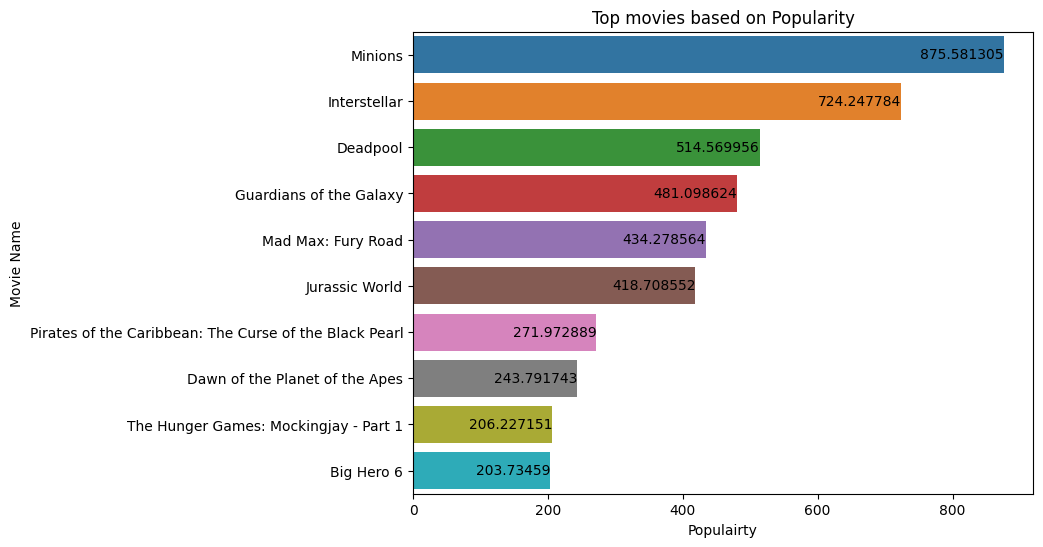

In [398]:
movies_eda = movies_eda.sort_values(by='popularity',ascending=False)
top_movies = movies_eda.head(10)
plt.figure(figsize = (8,6))
ax = sns.barplot(y = top_movies['title'],x = top_movies['popularity'])
for p in ax.patches:
  ax.annotate(f'{p.get_width()}',(p.get_width()+0.1,p.get_y()+p.get_height()/2),ha='right',va='center')
plt.xlabel('Populairty')
plt.ylabel('Movie Name')
plt.title('Top movies based on Popularity')
plt.show()

# _Movies based on the Profit or Loss:_

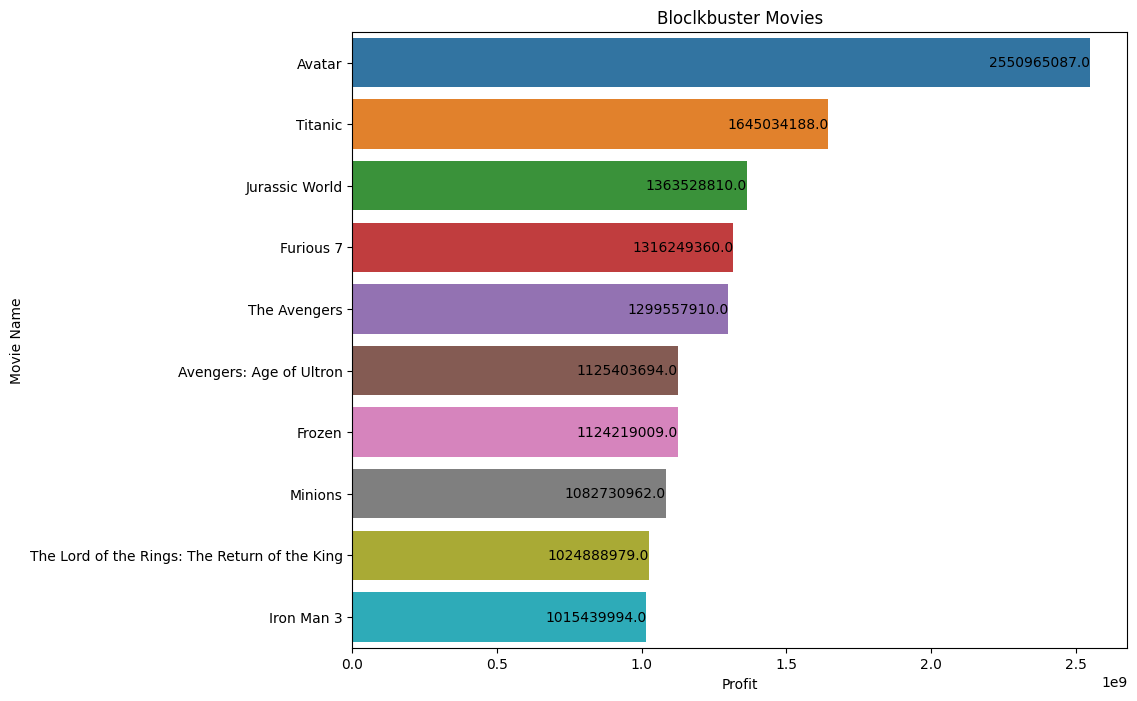

In [399]:
movies_eda['profit'] = movies_eda['revenue'] -  movies_eda['budget']
movies_eda = movies_eda.sort_values(by = 'profit', ascending=False)
blockbuster_movies = movies_eda.head(10)
utter_flop_movies = movies_eda.tail(10)
plt.figure(figsize= (10,8))
ax = sns.barplot(y=blockbuster_movies['title'], x=blockbuster_movies['profit'])
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='right', va='center')
plt.xlabel('Profit')
plt.ylabel('Movie Name')
plt.title('Bloclkbuster Movies')
plt.show()

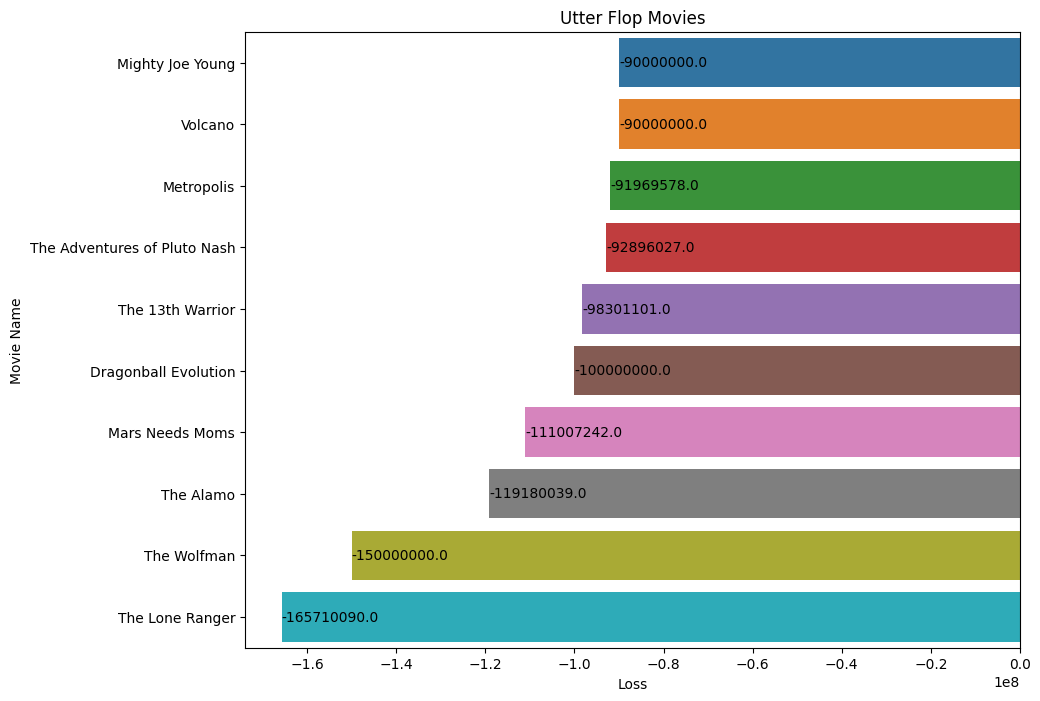

In [400]:
plt.figure(figsize= (10,8))
ax = sns.barplot(y=utter_flop_movies['title'], x=utter_flop_movies['profit'])
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='left', va='center')
plt.xlabel('Loss')
plt.ylabel('Movie Name')
plt.title('Utter Flop Movies')
plt.show()

marking each movies based on the profit or loss, we categorize them into Profit, Loss and No P/L.

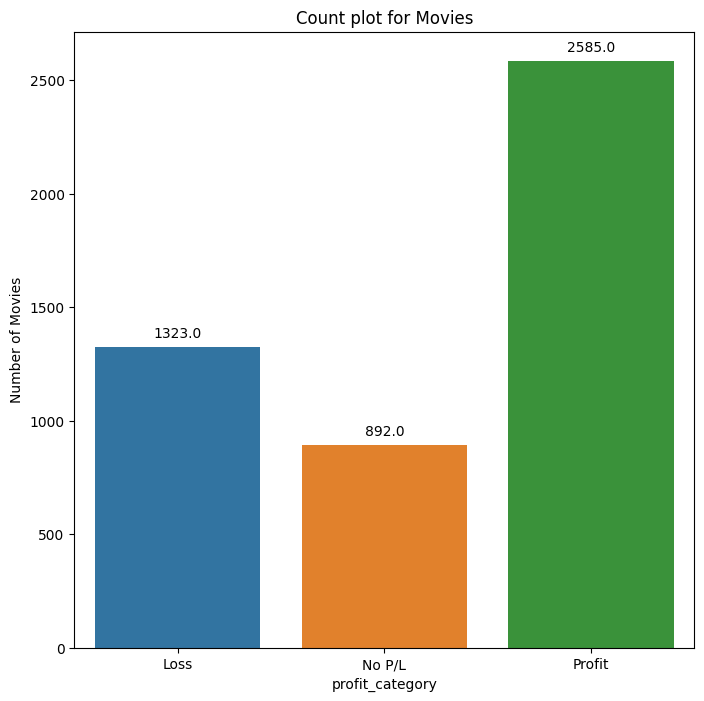

In [401]:
movies_eda['profit_category'] = pd.cut(movies_eda['profit'], bins=[float('-inf'), -1, 0, float('inf')],labels=['Loss', 'No P/L', 'Profit'])
plt.figure(figsize=(8,8))
ax1 = sns.countplot(data=movies_eda, x='profit_category')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
plt.ylabel('Number of Movies')
plt.title('Count plot for Movies')
plt.show()

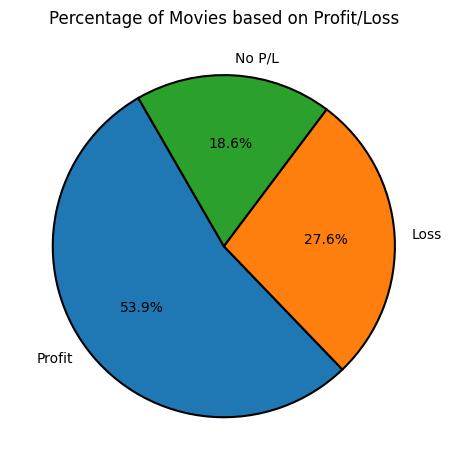

In [402]:
profit_loss = movies_eda['profit_category'].value_counts()
plt.pie(profit_loss,labels=profit_loss.index, startangle = 120,autopct='%1.1f%%',wedgeprops = {'edgecolor' : 'black','linewidth': 1.5,'antialiased' : True})
plt.title('Percentage of Movies based on Profit/Loss')
plt.tight_layout()
plt.show()

# _Vote count Categories:_

Now we categorize the movies based on vote_count for the movie.

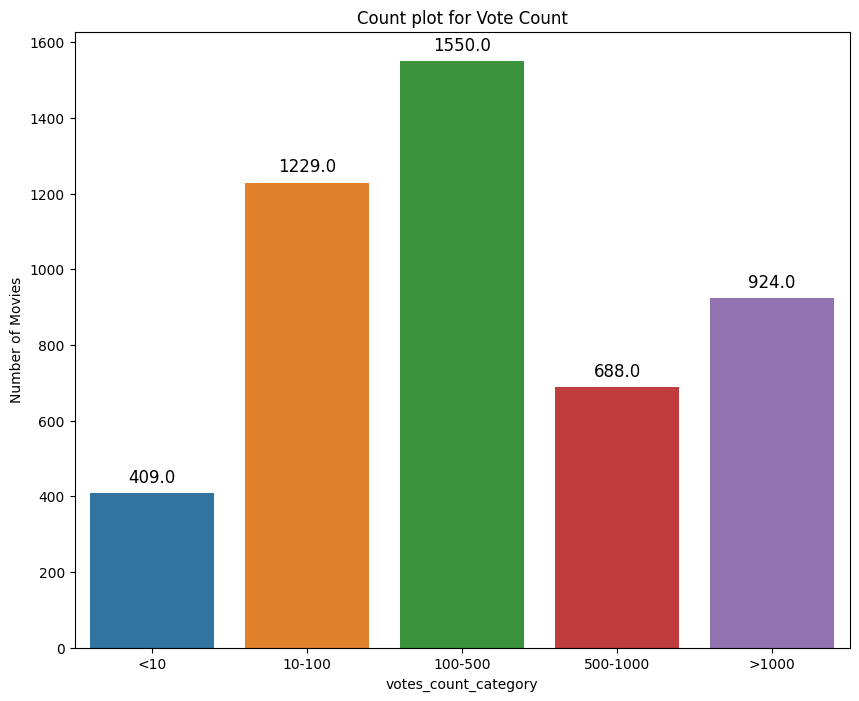

In [403]:
movies_eda['votes_count_category'] = pd.cut(movies_eda['vote_count'], bins=[0, 10, 100, 500, 1000, float('inf')],labels=['<10', '10-100', '100-500', '500-1000', '>1000'], right=False)
category_counts = movies_eda['votes_count_category'].value_counts()
plt.figure(figsize=(10,8))
axc = sns.countplot(data=movies_eda, x='votes_count_category')
for p in axc.patches:
    axc.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.ylabel('Number of Movies')
plt.title('Count plot for Vote Count')
plt.show()

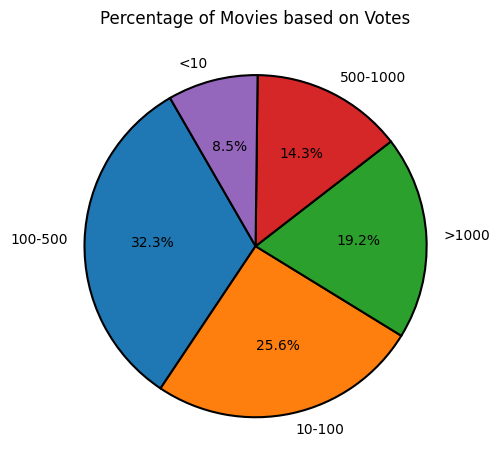

In [404]:
plt.pie(category_counts,labels=category_counts.index, startangle = 120,autopct='%1.1f%%',wedgeprops = {'edgecolor' : 'black','linewidth': 1.5,'antialiased' : True})
plt.title('Percentage of Movies based on Votes')
plt.tight_layout()
plt.show()

In [405]:
movies_eda.columns

Index(['movie_id', 'title', 'cast', 'crew', 'genres', 'keywords', 'overview',
       'budget', 'popularity', 'revenue', 'vote_average', 'vote_count',
       'profit', 'profit_category', 'votes_count_category'],
      dtype='object')

# _Vote average Categories:_

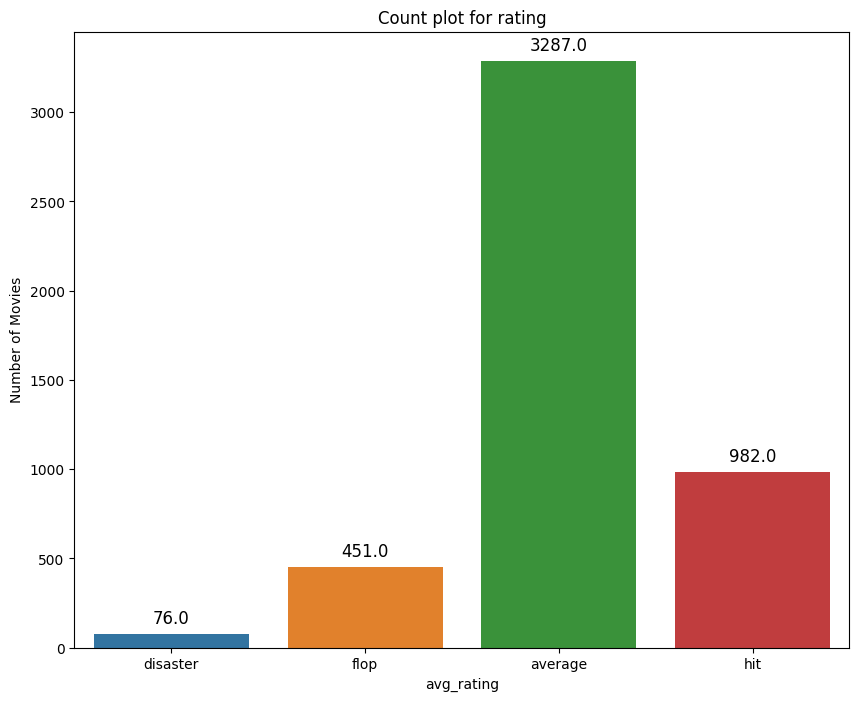

In [406]:
movies_eda['avg_rating']=pd.cut(movies_eda['vote_average'],bins = [0,2.5,5,7,10],labels=['disaster','flop','average','hit'],right=False)
rating_counts = movies_eda['avg_rating'].value_counts()
plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
ax1 = sns.countplot(data=movies_eda, x='avg_rating')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.ylabel('Number of Movies')
plt.title('Count plot for rating')
plt.show()

# _Movies based on Genres:_

We can categorize the movies based on the genre.
In the data we had, the genre columns are in the form as dictionary, so we extract them and count the number of movies per each genre.

In [407]:
import ast
def convert(obj):
  l = []
  for i in ast.literal_eval(obj):
    l.append(i['name'])
  return l
def convert_top3(obj):
  l = []
  counter = 0
  for i in ast.literal_eval(obj):
    if counter !=3:
      l.append(i['name'])
      counter +=1
    else:
      break
  return l
def fetch_director(obj):
  l = []
  counter = 0
  for i in ast.literal_eval(obj):
    if i['job']=='Director':
      l.append(i['name'])
  return l
def count_dict(series):
  dict={}
  for lists in series:
    for element in lists:
      if element in dict:
        dict[element] +=1
      else:
        dict[element] = 1
  return dict

In [408]:
# converting the genres column into a list containing all the genres of that movie
movies['genres'] = movies['genres'].apply(convert).apply(lambda x:[i.replace(" ","") for i in x])
movies_eda['genres'] = movies_eda['genres'].apply(convert).apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(convert_top3).apply(lambda x:[i.replace(" ","") for i in x])
movies_eda['cast'] = movies_eda['cast'].apply(convert_top3).apply(lambda x:[i.replace(" ","") for i in x])

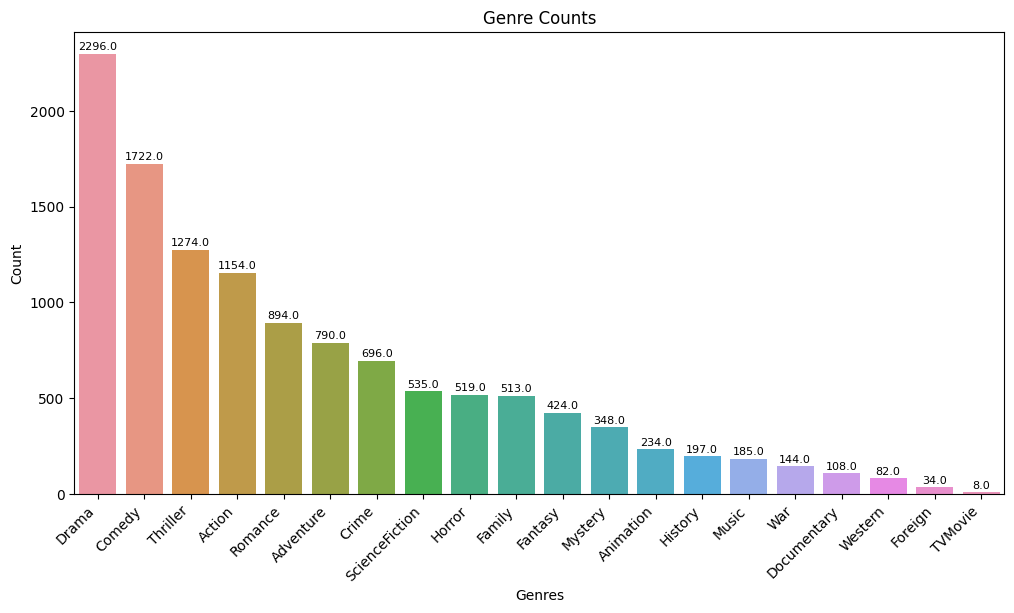

In [409]:
genre_count_dict = count_dict(movies_eda['genres'])
genre_count_series = pd.Series(genre_count_dict).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genre_count_series.index, y=genre_count_series.values)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Genre Counts')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

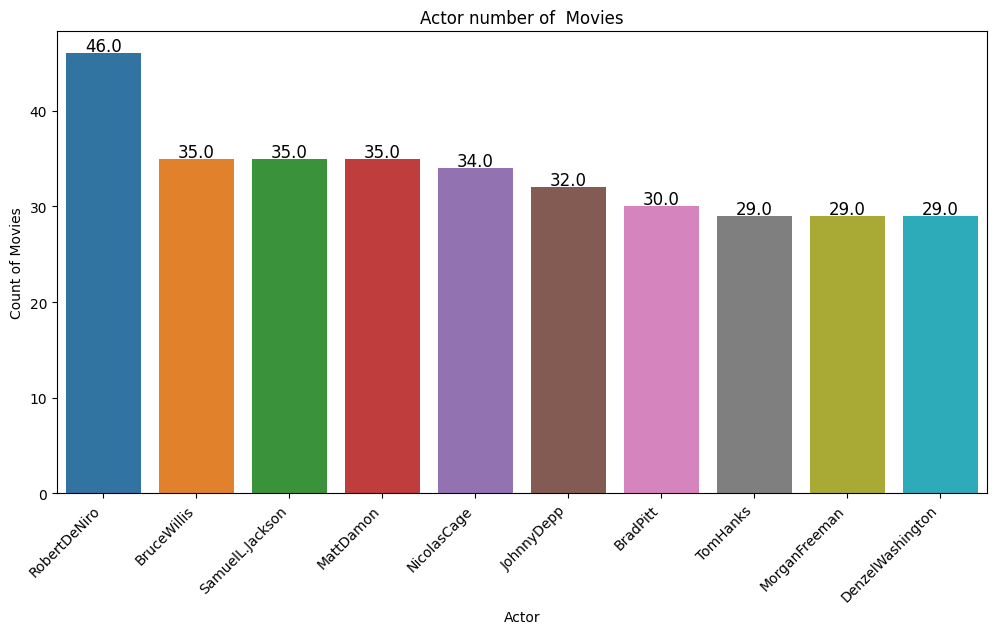

In [410]:
cast_count_dict = count_dict(movies_eda['cast'])
cast_count_series = pd.Series(cast_count_dict).sort_values(ascending=False).nlargest(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=cast_count_series.index, y=cast_count_series.values)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Actor number of  Movies')
plt.xlabel('Actor')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

We are done with EDA.

Summary of EDA:

1. Most Popular Movie: __Minions__ with $875.58$ popularity

2. Highest Grossing Film: __Avatar__ with almost $2.5Billion$ dollars profit.

3. Biggest Box Office Flop: __The Lone Ranger__ with almost $165.71$ dollars loss.

4. Movies with Profit: Almost $54$% of total movies i.e., $2585$ have made the profits at box office.

5. Average Vote Count: Most of the movies ($32$%) got votes between ($100 - 500$).

6. Average Rating: Most of the movies ($3287$) got on an average of rating between ($5-7$).

7. Top Genre: __Darama__ is the top genre with almost $2296$ movies.

8. Actor with most movies: __Robert De Niro__ acted most movies as lead with almost $46$ movies.

# __Data Preprocessing:__

for our model, we need only few columns which will be useful.

In [411]:
movies = movies[['movie_id', 'title', 'cast', 'crew','genres', 'keywords','overview',]]


In [412]:
movies.head(1)

,movie_id,title,cast,crew,genres,keywords,overview
0,19995,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Action, Adventure, Fantasy, ScienceFiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."


We need to tranform crew, keywords and overview columns in the dataframe for better training.

In [413]:
movies['overview']=movies['overview'].apply(lambda x:x.split())
movies['keywords'] = movies['keywords'].apply(convert).apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(fetch_director).apply(lambda x:[i.replace(" ","") for i in x])
movies.head(1)

,movie_id,title,cast,crew,genres,keywords,overview
0,19995,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin..."


In [414]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
movies['tags'] = movies['tags'].apply(lambda x:" ".join(x)).apply(lambda x:x.lower())


In [415]:
movies.head(1)

,movie_id,title,cast,crew,genres,keywords,overview,tags
0,19995,Avatar,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","in the 22nd century, a paraplegic marine is di..."


we can just take movie_id,title and tags from for our model training.

In [416]:
movies = movies[['movie_id','title','tags']]

In [417]:
movies.head(1)

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."


In [418]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

In [419]:
movies['tags'] = movies['tags'].apply(stem)

In [420]:
movies.head(1)

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."


In [421]:
movies.shape

(4800, 3)

# __Model Training:__

In [422]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [423]:
vectors=cv.fit_transform(movies['tags']).toarray()

In [424]:
from sklearn.metrics.pairwise import cosine_similarity

In [425]:
similarity=cosine_similarity(vectors)

In [426]:
def recommend(movie):
  recommended_movies=[]
  movie_index = movies[movies['title']==movie].index[0]
  if movie_index >=4800:
    return recommended_movies
  distances = similarity[movie_index]
  movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
  for i in movies_list:
    mv = movies.iloc[i[0]].title
    recommended_movies.append(mv)
  return movies_list

In [427]:
recommendations={}
titles = movies['title']
for i in titles:
  recommendations[i] = recommend(i)

In [428]:
recommendations['Batman']

[(210, 0.4114755998989118),
 (119, 0.3340765523905305),
 (428, 0.3250056229832958),
 (4523, 0.32242634688922367),
 (3, 0.30194054243855883)]

In [429]:
def recommend_movies(movie):
  movie_index = movies[movies['title']==movie].index[0]
  distances = similarity[movie_index]
  movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
  for i in movies_list:
    mv = movies.iloc[i[0]].title
    print(mv)

In [430]:
recommend_movies('Batman')

Batman & Robin
Batman Begins
Batman Returns
The R.M.
The Dark Knight Rises


In [431]:
import sys

size_in_recommendations = sys.getsizeof(recommendations)/ (1024 * 1024)
size_in_movies = sys.getsizeof(movies)/ (1024 * 1024)
size_in_similarity = sys.getsizeof(similarity)/ (1024 * 1024)

print(f"Size of the recommendations: {size_in_recommendations} MB")
print(f"Size of the movies: {size_in_movies} MB")
print(f"Size of the similarity: {size_in_similarity} MB")

Size of the recommendations: 0.140716552734375 MB
Size of the movies: 2.8269805908203125 MB
Size of the similarity: 175.7813720703125 MB


In [432]:
import pickle

In [433]:
pickle.dump(movies,open('movies.pkl','wb'))

In [434]:
pickle.dump(movies.to_dict(),open('movies_dict.pkl','wb'))

In [435]:
pickle.dump(recommendations,open('recommendations.pkl','wb'))